In [1]:
!pip install lifetimes

     |████████████████████████████████| 583kB 2.3MB/s eta 0:00:01
     |████████████████████████████████| 184kB 5.0MB/s eta 0:00:01
  Stored in directory: /Users/talre83086/Library/Caches/pip/wheels/42/62/66/1121afe23ff96af4e452e0d15e68761e3f605952ee075ca99f
  Stored in directory: /Users/talre83086/Library/Caches/pip/wheels/27/4b/a2/34ccdcc2f158742cfe9650675560dea85f78c3f4628f7daad0
Successfully built autograd dill


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from lifetimes.utils import *
from lifetimes import BetaGeoFitter
from lifetimes.plotting import plot_probability_alive_matrix, plot_frequency_recency_matrix, plot_period_transactions, plot_cumulative_transactions, plot_incremental_transactions

from lifetimes.generate_data import beta_geometric_nbd_model
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases, plot_period_transactions, plot_history_alive

import warnings 
warnings.simplefilter('ignore')

sns.set(rc = {'figure.figsize': (10, 10)})
%matplotlib inline


In [149]:
filepath = 'EmazeEventsDB1.csv'
events = pd.read_csv(filepath)

In [150]:
events.head()

,EmazeEventID,eventtype,username,userid,countrycode,affid,campid,subid,lpid,category,datetime,installdate,ipaddress,clickid,browseragent,label,source,computername,cpuid,macaddress,originalaffid,originalcampid,originalsubid,guid
0,465519,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,2014-05-31 00:00:47.037,NaN,199.87.228.66,NaN,Pingdom.com_bot_version_1.4_(http://www.pingdo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,465553,NaN,NaN,NaN,SE,NaN,NaN,NaN,NaN,NaN,2014-05-31 00:01:47.903,NaN,94.247.174.83,NaN,Pingdom.com_bot_version_1.4_(http://www.pingdo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,465588,NaN,NaN,NaN,FR,NaN,NaN,NaN,NaN,NaN,2014-05-31 00:02:47.383,NaN,176.31.228.137,NaN,Pingdom.com_bot_version_1.4_(http://www.pingdo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,465628,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,2014-05-31 00:03:47.037,NaN,108.62.115.226,NaN,Pingdom.com_bot_version_1.4_(http://www.pingdo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,465662,NaN,NaN,NaN,CH,NaN,NaN,NaN,NaN,NaN,2014-05-31 00:04:47.433,NaN,178.255.153.2,NaN,Pingdom.com_bot_version_1.4_(http://www.pingdo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [151]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
EmazeEventID      100000 non-null int64
eventtype         88145 non-null object
username          9726 non-null object
userid            11310 non-null object
countrycode       99973 non-null object
affid             61232 non-null object
campid            61118 non-null object
subid             60825 non-null object
lpid              26330 non-null object
category          5094 non-null object
datetime          100000 non-null object
installdate       21 non-null object
ipaddress         100000 non-null object
clickid           39 non-null object
browseragent      39935 non-null object
label             82180 non-null object
source            88145 non-null object
computername      4320 non-null object
cpuid             4262 non-null object
macaddress        4171 non-null object
originalaffid     0 non-null float64
originalcampid    0 non-null float64
originalsubid     0 non-n

In [152]:
events.eventtype.value_counts() #cant really use this...

lp-php                                          55934
uniqueview                                      10806
view                                             4497
debug                                            3738
logout                                           3243
login                                            1865
newpres                                          1760
signup                                           1604
downloadfail                                     1490
startpptaddin                                     667
startezmz                                         492
uninstallPPTAddin                                 354
PlusHD                                            245
ipn-pp-ignored                                    216
installfail                                       181
startvb                                           156
VBSoftware                                        136
VisualbeeDB                                       130
taskswupdate                

In [153]:
events.eventtype.value_counts()

lp-php                                          55934
uniqueview                                      10806
view                                             4497
debug                                            3738
logout                                           3243
login                                            1865
newpres                                          1760
signup                                           1604
downloadfail                                     1490
startpptaddin                                     667
startezmz                                         492
uninstallPPTAddin                                 354
PlusHD                                            245
ipn-pp-ignored                                    216
installfail                                       181
startvb                                           156
VBSoftware                                        136
VisualbeeDB                                       130
taskswupdate                

In [154]:
events.ipaddress.value_counts().head()

168.62.27.46       3690
85.17.156.11       1115
188.138.124.110    1114
94.46.240.121      1114
94.247.174.83      1113
Name: ipaddress, dtype: int64

In [155]:
columns = ['username', 'datetime']
df_churn = events[columns].copy()
df_churn['username'] = events['ipaddress'].astype('category').cat.codes
df_churn['datetime'] = pd.to_datetime(df_churn['datetime']).dt.date
df_churn = df_churn.drop_duplicates()

In [156]:
df_churn.sort_values(by = 'datetime', ascending = False).head()

,username,datetime
54575,20443,2014-06-30
49674,13834,2014-06-30
46182,12923,2014-06-30
46183,12909,2014-06-30
46184,27830,2014-06-30


In [157]:
df_churn_summary = summary_data_from_transaction_data(df_churn, 'username', 'datetime', monetary_value_col= None)

In [158]:
df_churn_summary.head()

,frequency,recency,T
username,,,
0,0.0,0.0,7.0
1,0.0,0.0,30.0
2,0.0,0.0,27.0
3,0.0,0.0,30.0
4,0.0,0.0,28.0


In [159]:
df_churn_summary.sort_values(by = 'frequency', ascending = False).head()

,frequency,recency,T
username,,,
13767,29.0,30.0,30.0
14271,28.0,30.0,30.0
13834,23.0,30.0,30.0
12937,21.0,22.0,22.0
23560,18.0,30.0,30.0


In [160]:
bgf = BetaGeoFitter(penalizer_coef = 0.0)
bgf.fit(df_churn_summary['frequency'], df_churn_summary['recency'], df_churn_summary['T'])

<lifetimes.BetaGeoFitter: fitted with 51112 subjects, a: 2.75, alpha: 0.55, b: 1.52, r: 0.02>

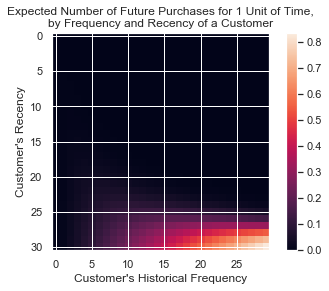

In [161]:
plot_frequency_recency_matrix(bgf)

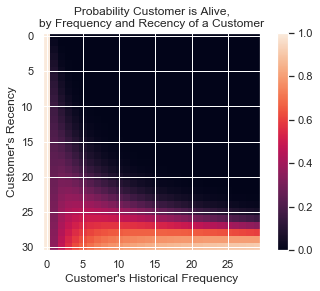

In [162]:
plot_probability_alive_matrix(bgf)

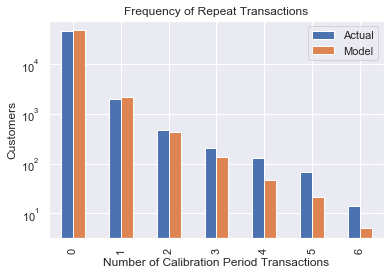

In [163]:
plot_period_transactions(bgf).set_yscale('log')

In [164]:
summary_cal_holdout = calibration_and_holdout_data(df_churn, 'username', 'datetime', calibration_period_end='2014-06-10')

In [165]:
summary_cal_holdout.head()

,frequency_cal,recency_cal,T_cal,frequency_holdout,duration_holdout
username,,,,,
1,0.0,0.0,10.0,0.0,20
2,0.0,0.0,7.0,0.0,20
3,0.0,0.0,10.0,0.0,20
4,0.0,0.0,8.0,0.0,20
5,0.0,0.0,10.0,0.0,20


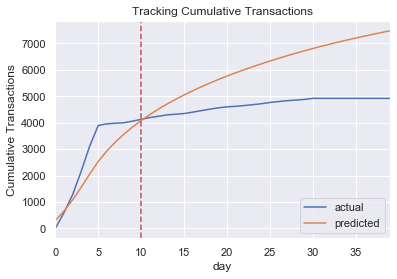

In [166]:
bgf.fit(summary_cal_holdout['frequency_cal'], summary_cal_holdout['recency_cal'],
       summary_cal_holdout['T_cal'])
plot_cumulative_transactions(bgf, df_churn, 'datetime', 'username', 40, 10)

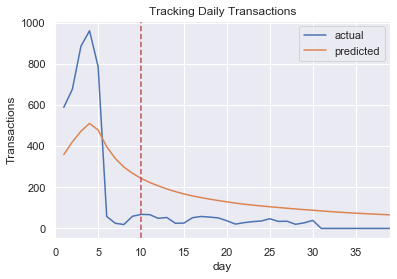

In [167]:
plot_incremental_transactions(bgf, df_churn, 'datetime', 'username', 40, 10)

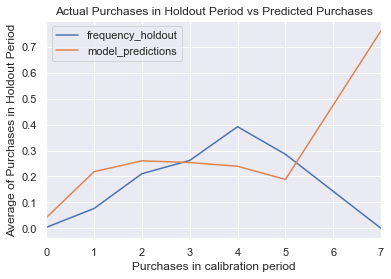

In [168]:
plot_calibration_purchases_vs_holdout_purchases(bgf, summary_cal_holdout)

In [169]:
events.groupby('username').size().value_counts().head()

1    1372
2     454
3     290
4     191
5     126
dtype: int64

### Now we predict churn. Based on how the model is, we only do it for customers with at least 1 repeat purchase

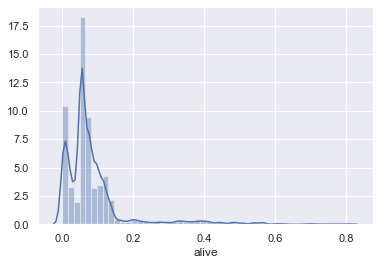

In [170]:
df_results = df_churn_summary[df_churn_summary.frequency>0]
df_results['alive'] = bgf.conditional_probability_alive(df_results['frequency'], 
                                                            df_results['recency'],
                                                            df_results['T'])
sns.distplot(df_results['alive'])

### We need to decide at what level a customer is considered churned. Lets say for simplicity that a customer is churned if the probability of being alive falls below 20%

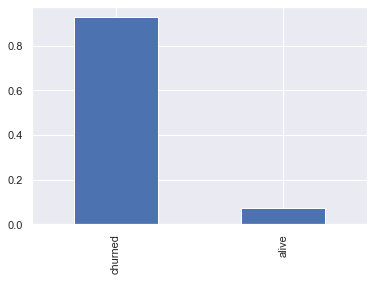

In [171]:
df_results['is_churned'] = 'alive'
df_results['is_churned'][df_results['alive']<0.2] = 'churned'
df_results.is_churned.value_counts(normalize = True).plot.bar()

### Identify customers at a high risk of churning

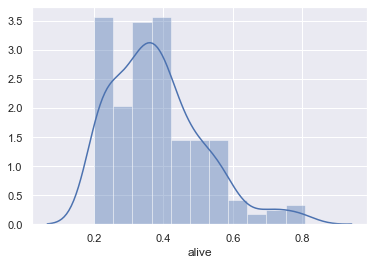

In [172]:
sns.distplot(df_results[df_results['is_churned']=='alive'].alive)

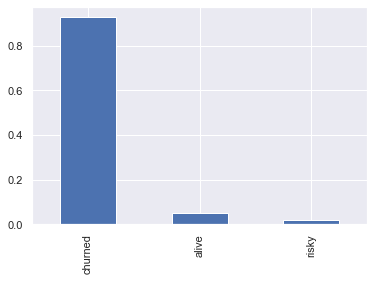

In [173]:
df_results['is_churned'][(df_results['alive']>0.2)&(df_results['alive']<0.3)] = 'risky'
df_results.is_churned.value_counts(normalize = True).plot.bar()

In [174]:
df_results[df_results['is_churned']=='risky'].head()

,frequency,recency,T,alive,is_churned
username,,,,,
3701,4.0,21.0,30.0,0.229293,risky
3828,3.0,22.0,30.0,0.299963,risky
4102,1.0,12.0,25.0,0.286082,risky
4191,2.0,20.0,30.0,0.298280,risky
7448,1.0,1.0,4.0,0.252556,risky
